In [ ]:
#pip install langgraph langsmith

In [ ]:
#pip install langchain langchain_groq langchain_community

In [ ]:
groq_api_key='dyb3FYUsxlKyCcqNnSAIoDjFp'
langsmith='lsv2_pt_880ee6b869ff0a58e30_de6020f976'

In [2]:
from langchain_groq import ChatGroq

In [3]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000263BD83C2F0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000263BD83D010>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [6]:
graph_builder

In [7]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [8]:
graph_builder.add_node("chatbot",chatbot)

In [9]:
graph_builder

In [10]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [11]:
graph=graph_builder.compile()

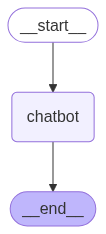

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass 

In [13]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Let\'s break down LangGraph.\n\n**What is LangGraph?**\n\nLangGraph is a powerful open-source tool designed to analyze and visualize the structure of language. It\'s essentially a framework that allows you to represent words and their relationships within a text as a graph. \n\n**Why Use a Graph?**\n\nThink of a graph as a network of interconnected nodes (representing words) and edges (representing relationships between words). This visual representation can reveal fascinating insights about how language works:\n\n* **Semantic Relationships:**  LangGraph can identify words that frequently appear together, suggesting semantic connections (e.g., "cat" and "meow" are likely to be linked).\n* **Syntactic Structure:**  It can uncover grammatical relationships between words, indicating how they function within sentences.\n* **Topic Modeling:**  By analyzing clusters of related words, LangGraph can help you identify the main themes or topics within